### Загружаем библиотеки

In [51]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import pandas as pd
from sklearn import datasets
from matplotlib.colors import ListedColormap
from sklearn.ensemble import VotingClassifier

### Создаем класс линейнок регрессии

In [52]:
class AdalineGD(object):
    
    def __init__(self, eta = 0.1, n = 10):
        self.eta= eta
        self.n = n
        
    def fit(self, X, y):
        self.w_ = np.zeros(1 + X.shape[1])
        self.cost_ = []
        
        for i in range(self.n):
            output = self.net_input(X)
            errors = (y - output)
            self.w_[1:] += self.eta * X.T.dot(errors)
            self.w_[0] += self.eta * errors.sum()
            cost = (errors**2).sum() / 2.0
            self.cost_.append(cost)
        return self
    
    def net_input(self, X):
        return np.dot(X, self.w_[1:]) + self.w_[0]
    
    def activation(self , X):
        return self.net_input(X)
    
    def predict(self, X):
        return np.where(self.activation(X) >= 0 , 1, -1)
            
    

### Для примера загрузим датасет ирисов

In [6]:
url = 'https://archive.ics.uci.edu/ml/machine-learning-databases/iris/iris.data'
data = pd.read_csv(url , header = None)

data.head()

,0,1,2,3,4
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


### Визуализируем данные, оставив только первые два параметра,где хорошо видно что зеленый класс линейно отделим от красного или синего. Для модели выберем зеленый и красный классы

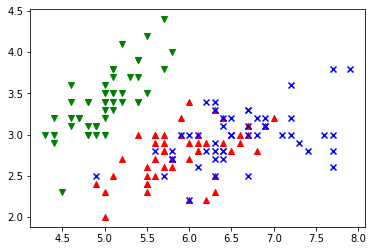

In [53]:
allX = data.iloc[:150, [0, 1]].values
X = data.iloc[:100, [0, 1]].values
y = data.iloc[:100, 4].values
y = np.where(y == 'Iris-setosa' , -1 , 1)

plt.scatter(allX[:50 , 0] , allX[:50  , 1] , color ='green', marker = 'v')
plt.scatter(allX[50:100 , 0] , allX[50:100  , 1] , color ='red', marker = '^')
plt.scatter(allX[100:150 , 0] , allX[100:150  , 1] , color ='blue', marker = 'x')
plt.show()

### Обучим модель с параметром эта = 0.001
на графике видно что градиентный бустинг перепрыгнул точку локального минимума и переобучается, необходимо взять параметр эта меньше, что отрицательно повлияет на скорость работы функции.

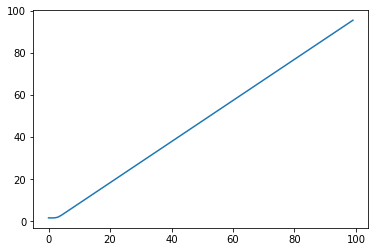

In [54]:
ada1 = AdalineGD(0.001 , 100).fit(X,y)
plt.plot(np.log10(ada1.cost_) )

### Обучим модель с параметром эта = 0.0001
теперь фукнция ошибки падает, но это занимает более 1000 этераций.

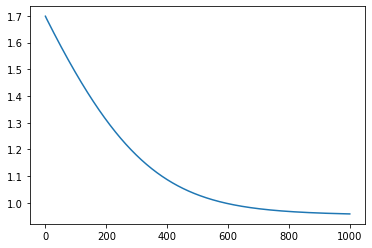

In [55]:
ada2 = AdalineGD(0.0001, 1000).fit(X,y)
plt.plot(np.log10(ada2.cost_))

### Посмотрим итоговые коэфициенты

In [57]:
ada2.w_

array([-0.18151543,  0.77658907, -1.3110747 ])

### Напишем функцию визуалицации
которая отобразит области на которые модель делит выборку

In [58]:
def plot_decision_regions(X, y ,classifier, resolution = 0.01):

    markers = ('v' , '^')
    colors = ('green' , 'red')
    cmap = ListedColormap(colors[:len(np.unique(y))])
    
    x1_min , x1_max = X[:, 0].min() - 1 , X[:, 0].max() + 1
    x2_min , x2_max = X[:, 1].min() - 1 , X[:, 1].max() + 1
    xx1, xx2 = np.meshgrid(np.arange(x1_min, x1_max, resolution) ,np.arange(x2_min, x2_max, resolution))
    
    Z = classifier.predict(np.array([xx1.ravel() , xx2.ravel()]).T)
    Z = Z.reshape(xx1.shape)
    
    plt.contourf(xx1, xx2, Z, alpha = 0.4, cmap = cmap)
    plt.xlim(xx1.min(), xx1.max())
    plt.ylim(xx2.min(), xx2.max())
    
    for idx, cl in enumerate(np.unique(y)):
        plt.scatter(x = X[y == cl, 0] , y = X[y == cl, 1],
            alpha = 0.8, c = cmap(idx), marker = markers[idx], label = cl)

### Выведем решение для нашей модели

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.


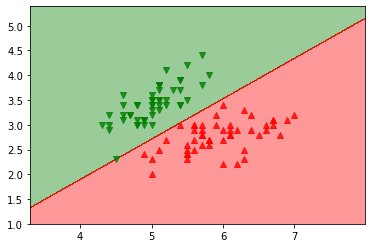

In [38]:
plot_decision_regions(X, y, ada2, 0.01)

### Стандартизируем

In [73]:
X_std = np.copy(X)

In [82]:
X_std[:, 0] = (X[:, 0] - X[:, 0].mean()) / X[:, 0].std()
X_std[:, 1] = (X[:, 1] - X[:, 1].mean()) / X[:, 1].std()

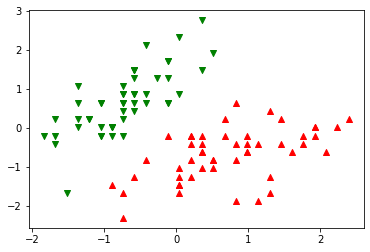

In [88]:
plt.scatter(X_std[:50, 0], X_std[:50,1]  , color= 'green' , marker = 'v')
plt.scatter(X_std[50:, 0], X_std[50:,1]  , color= 'red', marker ='^')
plt.show()

In [102]:
ada_std = AdalineGD(0.01, 15).fit(X_std, y)

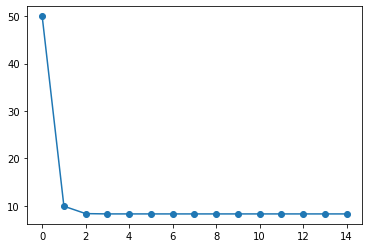

In [105]:
plt.plot(ada_std.cost_, marker = 'o')
plt.show()

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.


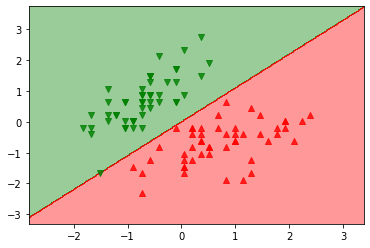

In [104]:
plot_decision_regions(X_std, y, ada_std, 0.02)